In [6]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

data_dir = '/pscratch/sd/e/efdez/Uchuu/Y1/'
data_fn = Path(data_dir) / 'uchuu-desi-y3_v2_0p65_mask.txt'
data = np.genfromtxt(data_fn, usecols=(-3, -2, -1), skip_header=1)


In [5]:
data[:, 1]

array([266.33962, 170.82241,   0.81521, ..., 239.03719, 269.11887,
        50.90083])

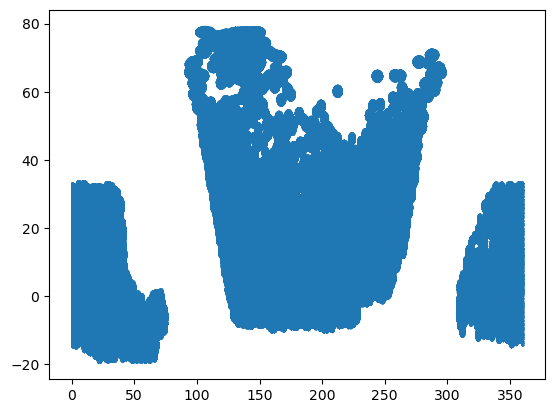

In [7]:
fig, ax = plt.subplots()

ax.scatter(data[:, 0], data[:, 1], s=0.1, marker='.')

plt.show()

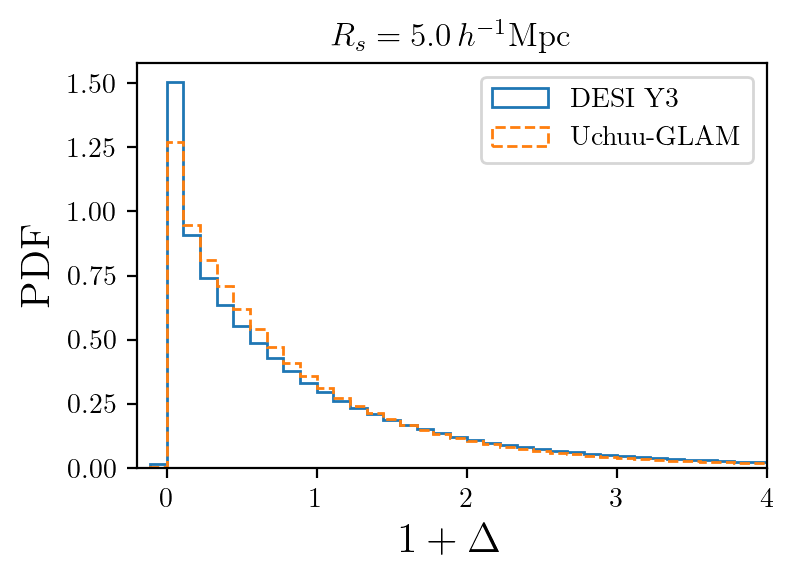

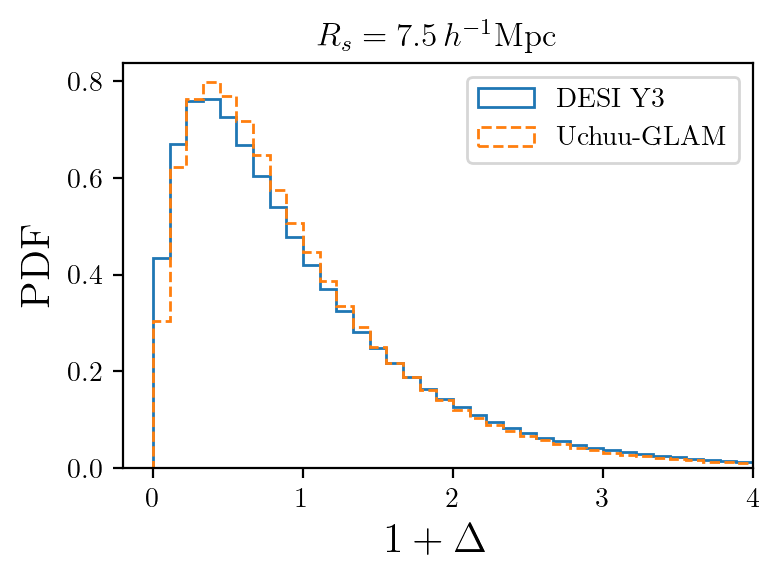

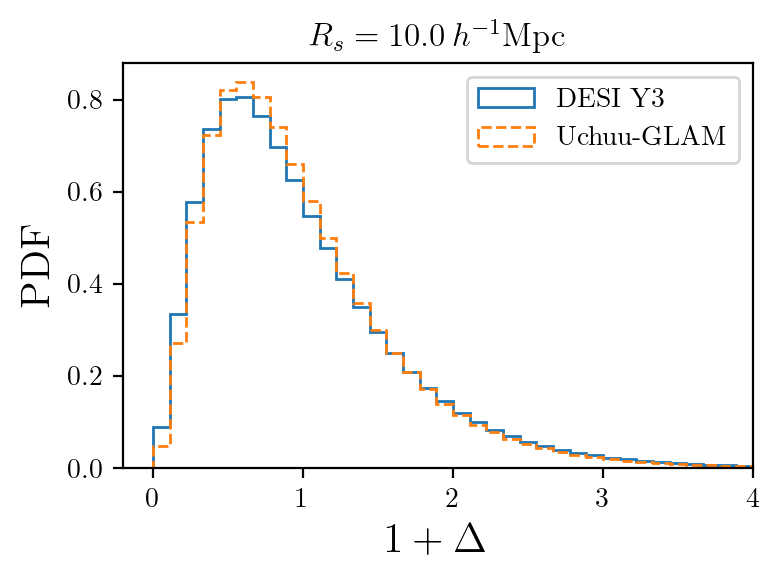

In [86]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

zmin, zmax = 0.6, 0.8
bins = np.linspace(-1, 10, 100)

for smoothing_radius in [5.0, 7.5, 10.0]:

    data_dir = '/pscratch/sd/e/epaillas/cic'
    data_fn = Path(data_dir) / f'CIC_LRG_z{zmin}-{zmax}_sm{smoothing_radius}.npy'
    cic_data = np.load(data_fn)
    # cic_data = cic_data[(cic_data > -1) & (cic_data < 30)]

    data_dir = '/pscratch/sd/e/epaillas/cic'
    data_fn = Path(data_dir) / f'CIC_Uchuu_LRG_z{zmin}-{zmax}_sm{smoothing_radius}.npy'
    cic_uchuu = np.load(data_fn)
    # cic_uchuu = cic_uchuu[(cic_uchuu > -1) & (cic_uchuu < 30)]

    fig, ax = plt.subplots(figsize=(4, 3))

    ax.hist((1 + cic_data), bins=bins, density=True, alpha=1.0, label='DESI Y3', histtype='step')
    ax.hist((1 + cic_uchuu), bins=bins, density=True, alpha=1.0, label='Uchuu-GLAM', histtype='step', ls='--')

    ax.set_xlim(-0.2, 4.0)
    # ax.set_xscale('log')
    # ax.set_yscale('log')
    ax.set_xlabel(r'$1 + \Delta$', fontsize=15)
    ax.set_ylabel('PDF', fontsize=15)
    ax.legend()
    ax.set_title(rf'$R_s = {smoothing_radius}\, h^{{-1}}{{\rm Mpc}}$')
    plt.tight_layout()
    plt.show()